In [116]:
martini2= [105,75,15,5,20,130,200,105,75,15,5,20,130,175,260,90,185,200,200,200,200,225,200,100,100,100,260,80,120,200,200,200,200,200,230,170,155,200,200,200]
K_boltzmann = [1.28867059,5.661059458,1.245206503,5.076485092,5.421039491,1.557185528,1.938639895,
               1.289768048,1.438540753,4.957645528,5.863961859,5.435250012,1.557185342,7.843628387,
               6.103702367,1.344723432,6.088464154,4.900443822,5.435591931,6.892929403,6.502198579,2.248206583,5.638250653,1.474018311,2.399082086,2.665829516,1.283615204,5.59745385,5.693773202,1.691131757,6.61821624,6.618221496,6.618221496,6.583588862,2.117515328,6.466035917,7.280278184,1.782737205,6.517495727,2.189257519]
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.11587783],
       [0.11587783, 1.        ]])

In [117]:
martini_data = [95,93,160,180,170,130,84,117,95,153,135,87,115,74,92,95,99,99,55,42,103,129,137,72,117,84,96.5,94,103,155,61,71,47]
boltzmann_dist_data = [125.663706,73.8413927,119.3805039,114.6378421,120.9222999,116.238933,
                       84.82301227,108.3770019,32.78549324,94.24767528,124.0840892,89.67526512,111.7107208,70.72468218,92.70268831,28.27434755,98.94955378,153.9380343,50.26548217,53.40700105,25.13287108,111.5818678,123.9555317,69.11505445,95.97250557,117.6557956,92.69336142,34.55751887,102.1555248,149.1928888,62.83185286,70.7398918,53.40707502]
gaussian_dist_data = [122.1347568,73.39134034,122.4384606,118.050877,121.0347794,117.4133302,
                      83.6883298,104.0040409,33.31613666,113.5895066,125.1413646,85.48132898,
                      111.3852574,71.23714547,91.64029912,28.7881953,98.34443939,151.4579902,
                      49.56677413,53.33387722,33.59831125,112.3778997,124.1142382,70.41805097,
                      113.239885,83.6883298,92.36503846,28.58879239,98.17228412,149.8977137,
                      61.97353067,70.50855771,47.46694594]


# import numpy as np
# np.corrcoef(martini_data, boltzmann_dist_data)


import numpy as np
print("correlation of distance : martini2 vs boltzmann")
print(np.corrcoef(martini_data, boltzmann_dist_data))

print("correlation of distance : gaussian vs boltzmann")
print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : martini2 vs boltzmann
[[1.         0.60150358]
 [0.60150358 1.        ]]
correlation of distance : gaussian vs boltzmann
[[1.         0.97250744]
 [0.97250744 1.        ]]


In [118]:
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plot
import math
from scipy.optimize import curve_fit
%matplotlib inline

In [119]:
angle_parameters = pd.DataFrame()
angle_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [120]:
angle_dict = dict.fromkeys(['BB1_BB2_BB3','BB2_BB3_ASC1','BB3_ASC1_ASC2','BB3_ASC1_ASC4','ASC1_ASC2_ASC3',\
'ASC2_ASC1_ASC4','ASC2_ASC3_ASC4','ASC3_ASC4_ASC1','BB2_BB3_USC1','BB3_USC1_USC2','BB3_USC1_USC3','USC1_USC2_USC3',\
'USC1_USC2_USC3','USC2_USC1_USC3','USC2_USC3_USC1','BB2_BB3_GSC1','BB3_GSC1_GSC2','BB3_GSC1_GSC4','GSC1_GSC2_GSC3','GSC2_GSC1_GSC4',\
'GSC2_GSC3_GSC4','GSC3_GSC4_GSC1','BB2_BB3_CSC1','BB3_CSC1_CSC2','BB3_CSC1_CSC3','CSC1_CSC2_CSC3','CSC2_CSC1_CSC3',\
'CSC2_CSC3_CSC1','BB2_BB3_pBB1','BB3_pBB1_pBB2','ASC1_BB3_pBB1','USC1_BB3_pBB1','GSC1_BB3_pBB1','CSC1_BB3_pBB1'])

In [121]:
df_Hmapped_angle_all = pd.read_csv('Xray_params_sirna/final_angle_sirna_Xray.csv')

In [122]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [123]:
BB1_BB2_BB3_Hmapped_angle_all = df_Hmapped_angle_all['BB1_BB2_BB3']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB3_ASC1_ASC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC2']
BB3_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC4']
ASC1_ASC2_ASC3_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_ASC2_ASC3']
ASC2_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC1_ASC4']
ASC2_ASC3_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC3_ASC4']
ASC3_ASC4_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['ASC3_ASC4_ASC1']
BB2_BB3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_USC1']
BB3_USC1_USC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC2']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
USC1_USC2_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC1_USC2_USC3']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
# USC2_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC1_USC3']
USC2_USC3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC3_USC1']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB2_BB3_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_GSC1']
BB3_GSC1_GSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC2']
BB3_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC4']
GSC1_GSC2_GSC3_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_GSC2_GSC3']
GSC2_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC1_GSC4']
GSC2_GSC3_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC3_GSC4']
GSC3_GSC4_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['GSC3_GSC4_GSC1']
BB2_BB3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_CSC1']
BB3_CSC1_CSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC2']
BB3_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC3']
CSC1_CSC2_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_CSC2_CSC3']
CSC2_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC1_CSC3']
CSC2_CSC3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC3_CSC1']
BB2_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_pBB1']
BB3_pBB1_pBB2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_pBB1_pBB2']
ASC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_BB3_pBB1']
USC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['USC1_BB3_pBB1']
GSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_BB3_pBB1']
CSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_BB3_pBB1']

In [124]:
BB2_BB3_USC1_Hmapped_angle_all

0     61.893
1     66.486
2     66.954
3     63.916
4     65.233
5     61.893
6     65.513
7     69.119
8     64.905
9     63.209
10    65.179
Name: BB2_BB3_USC1, dtype: float64

In [125]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)


In [126]:
import math
def harmonic_angle(theta, theta0, k):
    coslist = []
    for t in theta:
        coslist.append(math.cos(t) - math.cos(theta0))
    final_coslist = np.array(coslist)
    val = 0.5 * k * final_coslist ** 2
    return val

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 94.02836363636365
Mode: Raw data 93.54279711582676
Mode: Gauss-fitted 93.54279711582676


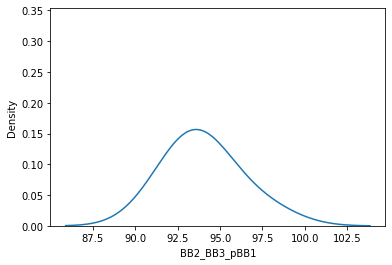

In [127]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  92.68301677658553
parameter K is:  3.128361544792186


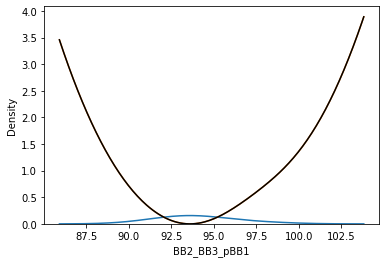

In [128]:

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[93, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2_Hmapped_angle_all
Mean: Raw data 65.51627272727274
Mode: Raw data 63.80471355387962
Mode: Gauss-fitted 63.80471355387962


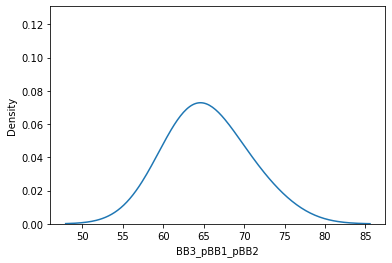

In [129]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  64.3817353609807
parameter K is:  3.1805778413363575


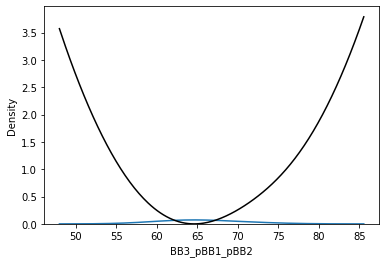

In [130]:

#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
# plt.plot(xdata,U,color='black')

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[64, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB3_pBB1_pBB2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

ASC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 122.42054545454545
Mode: Raw data 122.27895034996895
Mode: Gauss-fitted 122.27895034996895


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


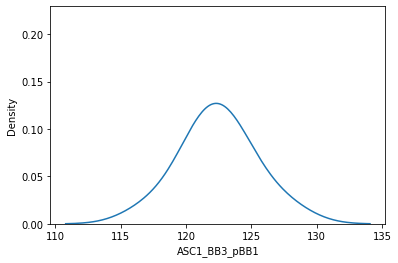

In [131]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  117.65335316310733
parameter K is:  2.750568704218935


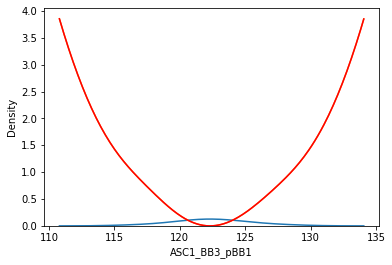

In [132]:

#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.8)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('ASC1_BB3_pBB1_Hmapped_angle_all')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 119.7300909090909
Mode: Raw data 118.95020749964
Mode: Gauss-fitted 118.95020749964


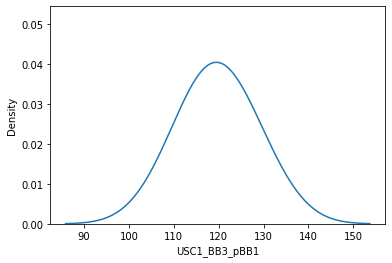

In [133]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  114.6061235202316
parameter K is:  2.716952341411213


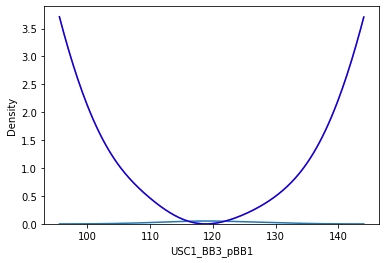

In [134]:

#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[119, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('USC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 121.7040909090909
Mode: Raw data 120.68269943105808
Mode: Gauss-fitted 120.68269943105808


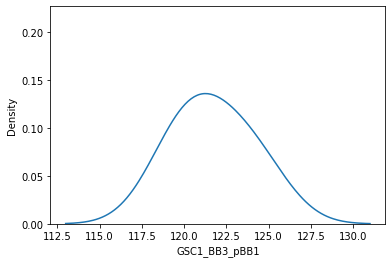

In [135]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.94262503089458
parameter K is:  2.7416906881966927


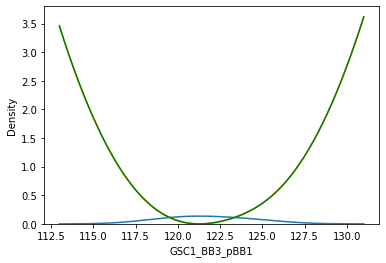

In [136]:

#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[121, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 116.07745454545456
Mode: Raw data 115.90474137739713
Mode: Gauss-fitted 115.90474137739713


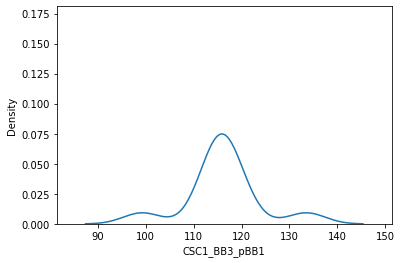

In [137]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  114.714499058867
parameter K is:  3.788323450821872


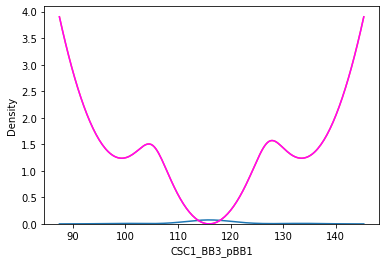

In [138]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[115, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('CSC1_BB3_pBB1_Hmapped_angle_all')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.83309090909091
Mode: Raw data 83.41878430847386
Mode: Gauss-fitted 83.41878430847386


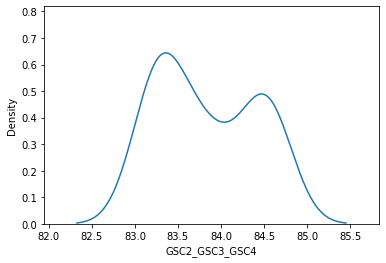

In [139]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  83.54106742497585
parameter K is:  4.127284793855329


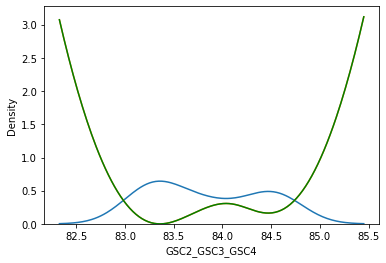

In [140]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[84, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC2_GSC3_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 94.02836363636365
Mode: Raw data 93.54279711582676
Mode: Gauss-fitted 93.54279711582676


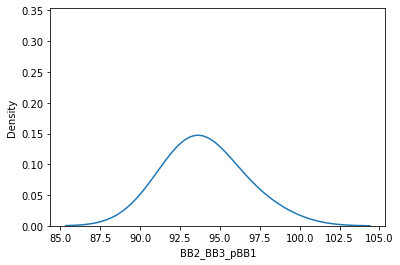

In [141]:
 # Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  92.77598498243155
parameter K is:  3.2298178784444818


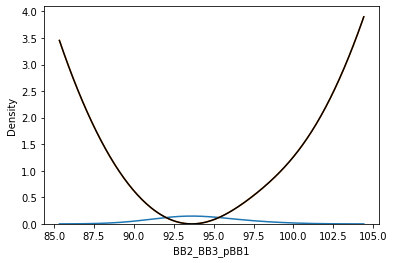

In [142]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1.1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[93, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2_Hmapped_angle_all
Mean: Raw data 65.51627272727274
Mode: Raw data 63.80471355387962
Mode: Gauss-fitted 63.80471355387962


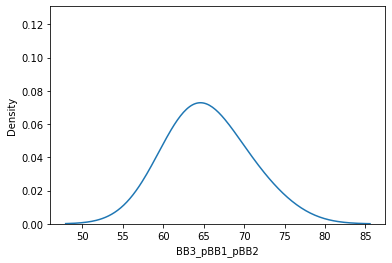

In [143]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_pBB1_pBB2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  67.56514164877505
parameter K is:  3.180585695899956


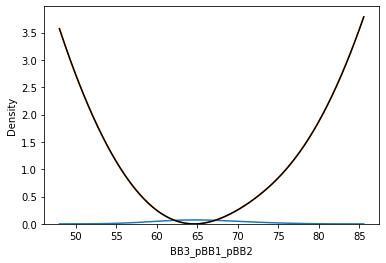

In [144]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[63.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_pBB1_pBB2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 122.42054545454545
Mode: Raw data 122.27895034996895
Mode: Gauss-fitted 122.27895034996895


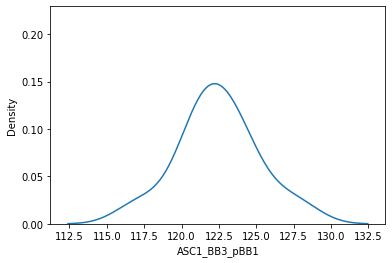

In [145]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.6)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  119.38041581268988
parameter K is:  0.5878424970389603


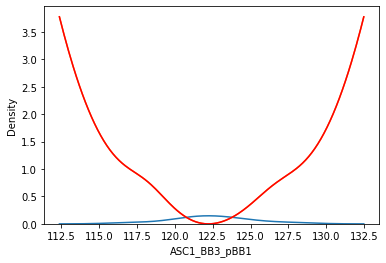

In [146]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.6)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 119.7300909090909
Mode: Raw data 118.95020749964
Mode: Gauss-fitted 118.95020749964


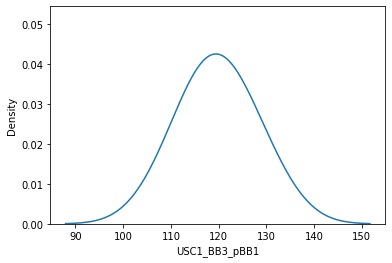

In [147]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  111.48785746823002
parameter K is:  3.2663782723384225


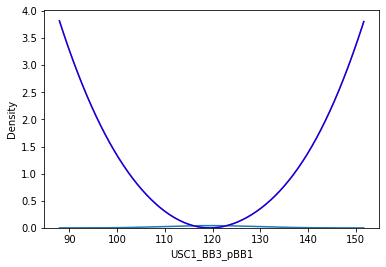

In [148]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[119, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 121.7040909090909
Mode: Raw data 120.68269943105808
Mode: Gauss-fitted 120.68269943105808


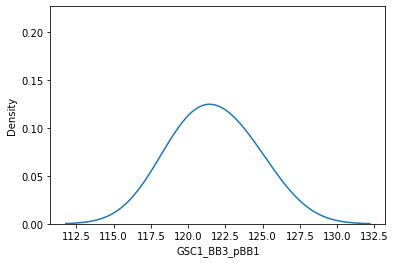

In [149]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  121.12233551573205
parameter K is:  2.8038628066769844


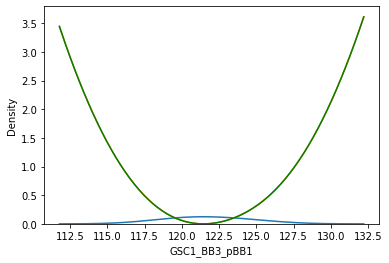

In [150]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[121, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 116.07745454545456
Mode: Raw data 115.90474137739713
Mode: Gauss-fitted 115.90474137739713


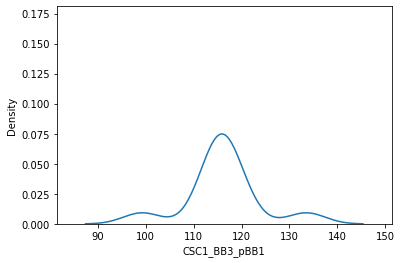

In [151]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  114.71449902618416
parameter K is:  3.788323510670595


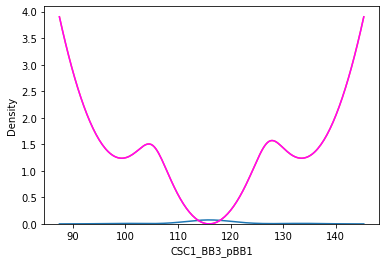

In [152]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[115, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_Hmapped_angle_all
Mean: Raw data 141.55409090909095
Mode: Raw data 141.8739308021381
Mode: Gauss-fitted 141.8739308021381


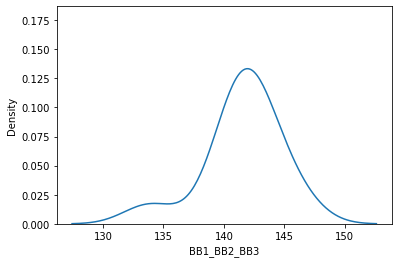

In [153]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_Hmapped_angle_all)
xmean = np.mean(BB1_BB2_BB3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB1_BB2_BB3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  136.68225713515386
parameter K is:  3.3743499575290614


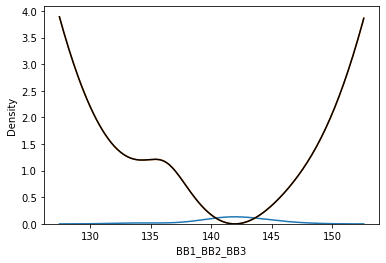

In [154]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[141, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB1_BB2_BB3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_ASC1_Hmapped_angle_all
Mean: Raw data 81.49963636363636
Mode: Raw data 80.44106974482229
Mode: Gauss-fitted 80.44106974482229


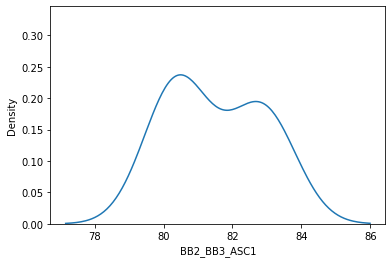

In [155]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_ASC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  81.68140880314077
parameter K is:  0.8323939184519352


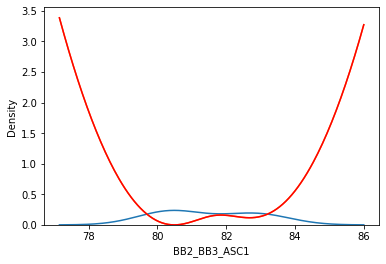

In [156]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[80, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_ASC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC2_Hmapped_angle_all
Mean: Raw data 113.51927272727272
Mode: Raw data 112.62217926466161
Mode: Gauss-fitted 112.62217926466161


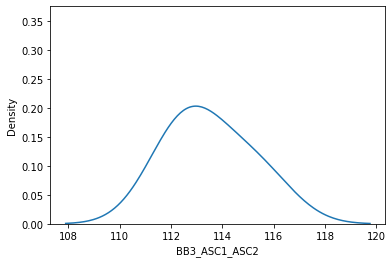

In [157]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC2_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_ASC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_ASC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  111.44437234019271
parameter K is:  2.606340045261525


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


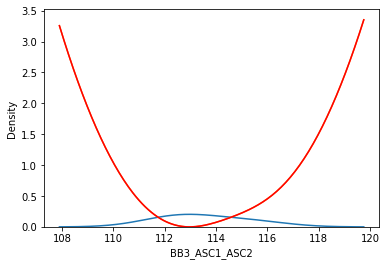

In [158]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[112, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_ASC1_ASC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC4_Hmapped_angle_all
Mean: Raw data 125.62136363636364
Mode: Raw data 127.21175627449766
Mode: Gauss-fitted 127.21175627449766


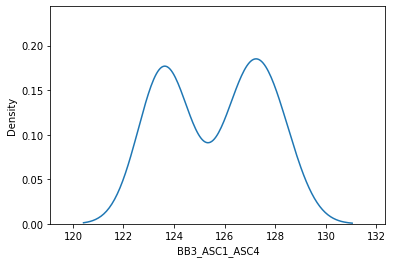

In [159]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  127.3753472546338
parameter K is:  1.473035165788246


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


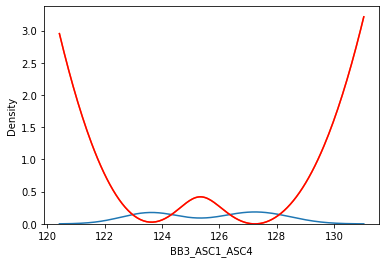

In [160]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[127, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_ASC1_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_ASC3_Hmapped_angle_all
Mean: Raw data 84.94872727272728
Mode: Raw data 85.2710170171167
Mode: Gauss-fitted 85.2710170171167


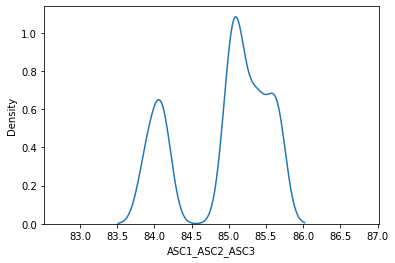

In [161]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_ASC3_Hmapped_angle_all)
xmean = np.mean(ASC1_ASC2_ASC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC2_ASC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_ASC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_ASC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  85.60372210239498
parameter K is:  39.739957694256404


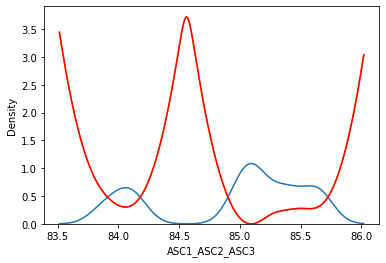

In [162]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[85.4, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC1_ASC2_ASC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC1_ASC4_Hmapped_angle_all
Mean: Raw data 111.77381818181817
Mode: Raw data 111.26782432924024
Mode: Gauss-fitted 111.26782432924024


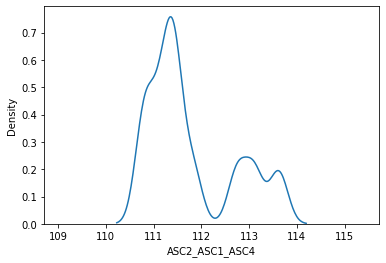

In [163]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC1_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC1_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  111.51375601454367
parameter K is:  2.9428197731064274


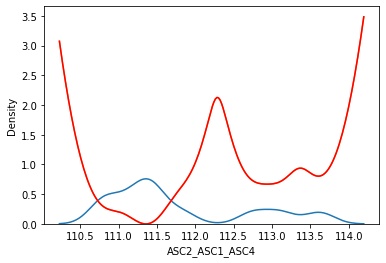

In [164]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[111, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC2_ASC1_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_ASC4_Hmapped_angle_all
Mean: Raw data 71.48572727272727
Mode: Raw data 71.61813362804268
Mode: Gauss-fitted 71.61813362804268


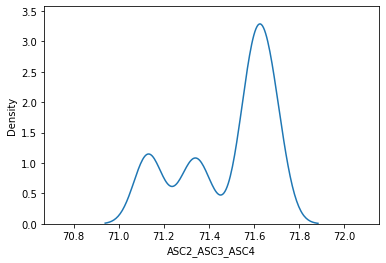

In [165]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC3_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC2_ASC3_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC3_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  69.11503807951667
parameter K is:  0.6636872772876131


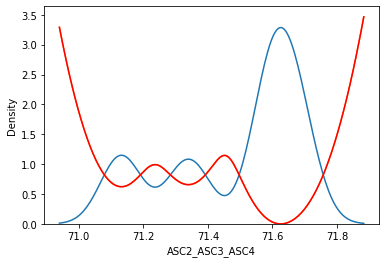

In [166]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[71, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC2_ASC3_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

ASC3_ASC4_ASC1_Hmapped_angle_all
Mean: Raw data 91.78518181818184
Mode: Raw data 91.79142244801234
Mode: Gauss-fitted 91.79142244801234


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


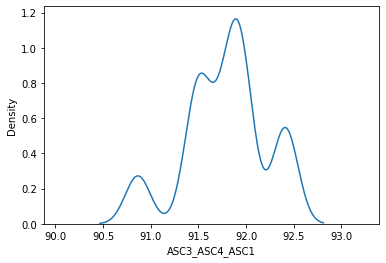

In [167]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_ASC1_Hmapped_angle_all)
xmean = np.mean(ASC3_ASC4_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC3_ASC4_ASC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_ASC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC3_ASC4_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  92.11770380579465
parameter K is:  12.138372242922213


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


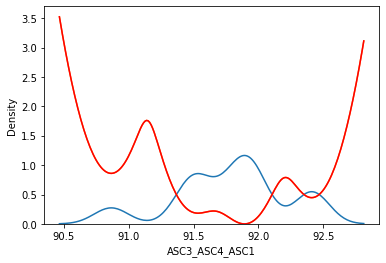

In [168]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[91.7, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC3_ASC4_ASC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

BB2_BB3_USC1_Hmapped_angle_all
Mean: Raw data 64.93636363636364
Mode: Raw data 65.16051767406
Mode: Gauss-fitted 65.16051767406


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


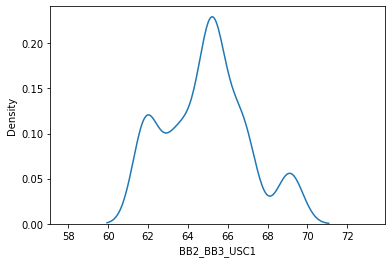

In [169]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_USC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  65.97343611893861
parameter K is:  0.5433801639368571


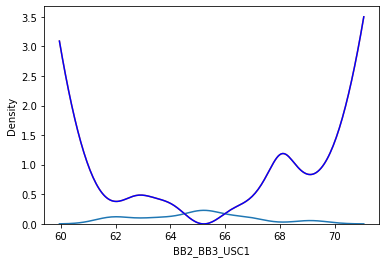

In [170]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[65, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_USC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC2_Hmapped_angle_all
Mean: Raw data 98.16136363636365
Mode: Raw data 98.89885229092724
Mode: Gauss-fitted 98.89885229092724


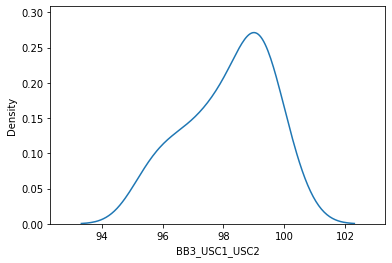

In [171]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC2_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_USC1_USC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_USC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  97.38937220712648
parameter K is:  0.8434714322921497


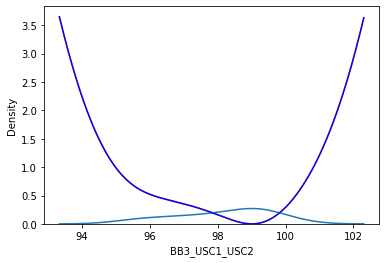

In [172]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[98.5, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_USC1_USC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC3_Hmapped_angle_all
Mean: Raw data 151.39354545454546
Mode: Raw data 151.88998272375665
Mode: Gauss-fitted 151.88998272375665


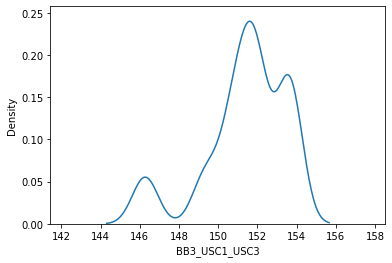

In [173]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_USC1_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  150.7964494666124
parameter K is:  0.6884838670458081


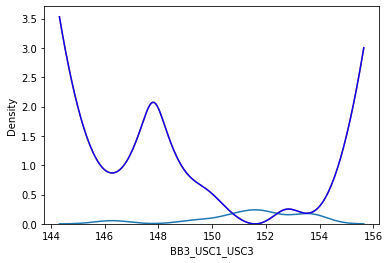

In [174]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[150, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])C1
angle_parameters_dict['Parameter'].append('BB3_USC1_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_USC3_Hmapped_angle_all
Mean: Raw data 62.69572727272726
Mode: Raw data 62.90418494542594
Mode: Gauss-fitted 62.90418494542594


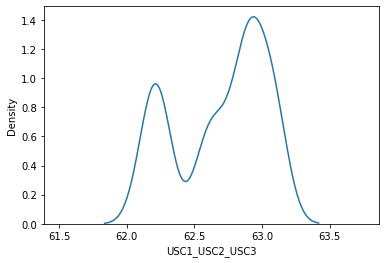

In [175]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_USC3_Hmapped_angle_all)
xmean = np.mean(USC1_USC2_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_USC2_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_USC2_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  62.83183794768933
parameter K is:  30.079078604961918


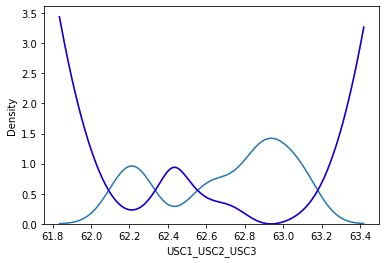

In [176]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[62, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC1_USC2_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [177]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(USC2_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC2_USC1_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC1_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

NameError: name 'USC2_USC1_USC3_Hmapped_angle_all' is not defined

In [178]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[77.1, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC2_USC1_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

NameError: name 'USC2_USC1_USC3_Hmapped_angle_all' is not defined

USC2_USC3_USC1_Hmapped_angle_all
Mean: Raw data 46.632090909090905
Mode: Raw data 46.23513777587244
Mode: Gauss-fitted 46.23513777587244


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


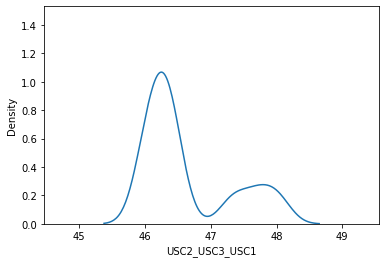

In [179]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_USC1_Hmapped_angle_all)
xmean = np.mean(USC2_USC3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC2_USC3_USC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_USC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  46.1790250938558
parameter K is:  15.460146376753784


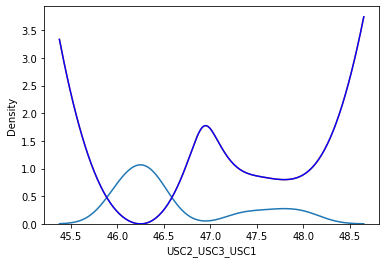

In [180]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[46, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC2_USC3_USC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_GSC1_Hmapped_angle_all
Mean: Raw data 81.67727272727274
Mode: Raw data 82.43834749789441
Mode: Gauss-fitted 82.43834749789441


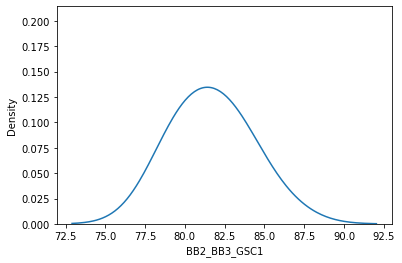

In [181]:
# plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
 
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1.0)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  86.4981787296653
parameter K is:  2.996654031275009


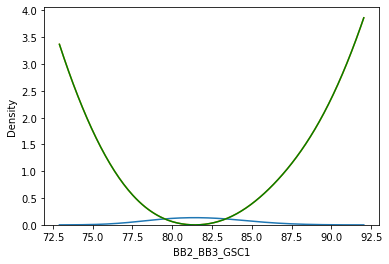

In [182]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[82, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_GSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC2_Hmapped_angle_all
Mean: Raw data 109.32990909090908
Mode: Raw data 109.90908929291022
Mode: Gauss-fitted 109.90908929291022


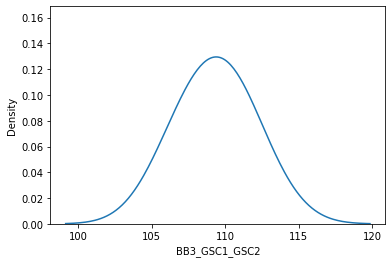

In [183]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC2_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_GSC1_GSC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_GSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  109.95574270267642
parameter K is:  0.989329710923236


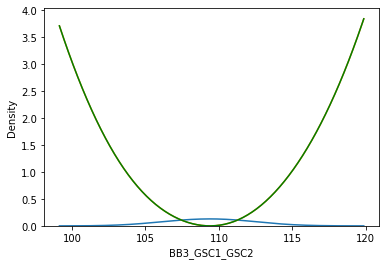

In [184]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[109, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_GSC1_GSC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 127.60527272727272
Mode: Raw data 128.72091152722544
Mode: Gauss-fitted 128.72091152722544


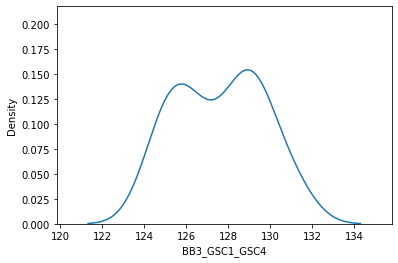

In [185]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_GSC1_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  125.66356636234215
parameter K is:  0.7215914734359542


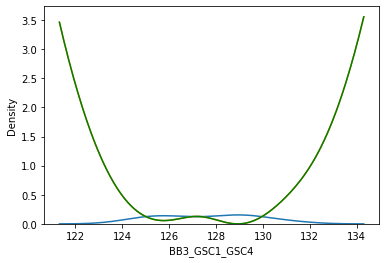

In [186]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[128, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_GSC1_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3_Hmapped_angle_all
Mean: Raw data 70.38309090909091
Mode: Raw data 70.58325917980189
Mode: Gauss-fitted 70.58325917980189


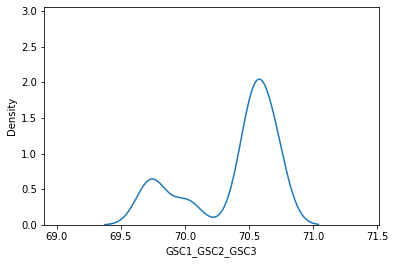

In [187]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_GSC3_Hmapped_angle_all)
xmean = np.mean(GSC1_GSC2_GSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC1_GSC2_GSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_GSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_GSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  70.3761508742414
parameter K is:  10.754909955648966


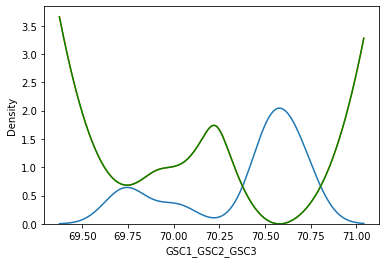

In [188]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC1_GSC2_GSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 114.11036363636366
Mode: Raw data 113.62130986320544
Mode: Gauss-fitted 113.62130986320544


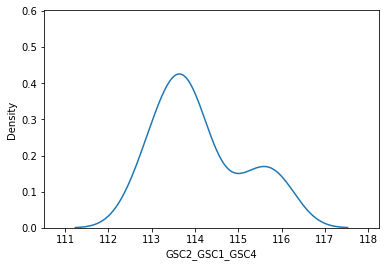

In [189]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC1_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC1_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  113.09733531207112
parameter K is:  0.8644339160788732


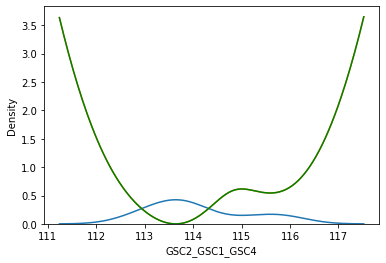

In [190]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[114, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC2_GSC1_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.83309090909091
Mode: Raw data 83.41878430847386
Mode: Gauss-fitted 83.41878430847386


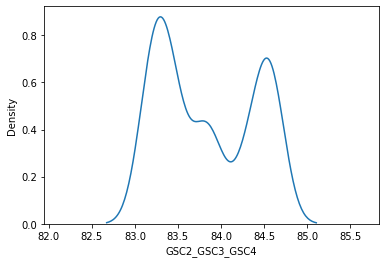

In [191]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])
angle_parameters_dict['Parameter'].append('GSC2_GSC3_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  83.61806134380828
parameter K is:  5.246485691881041


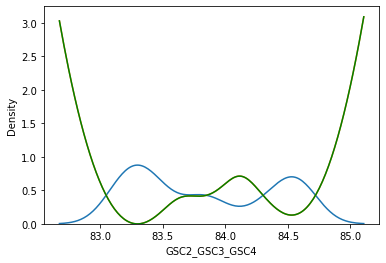

In [192]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[83.6, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_GSC1_Hmapped_angle_all
Mean: Raw data 91.66172727272726
Mode: Raw data 92.28404635540616
Mode: Gauss-fitted 92.28404635540616


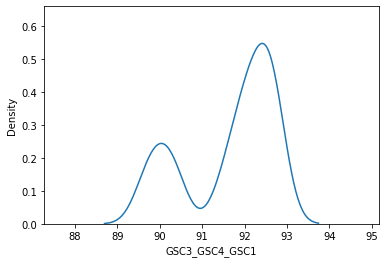

In [193]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_GSC1_Hmapped_angle_all)
xmean = np.mean(GSC3_GSC4_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC3_GSC4_GSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_GSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC3_GSC4_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  92.36601682547753
parameter K is:  4.8282805622967855


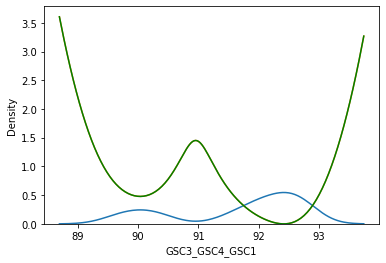

In [194]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[92.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC3_GSC4_GSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_Hmapped_angle_all
Mean: Raw data 63.85918181818182
Mode: Raw data 64.75741937302121
Mode: Gauss-fitted 64.75741937302121


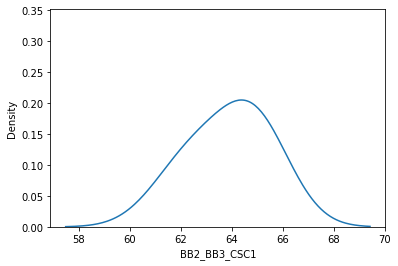

In [195]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_CSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  64.5061600466252
parameter K is:  2.6930271131798684


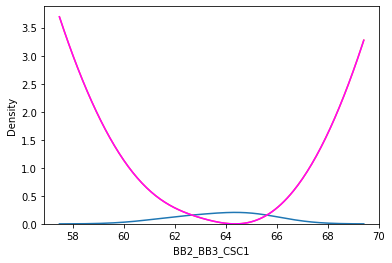

In [196]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[64, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_CSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

BB3_CSC1_CSC2_Hmapped_angle_all
Mean: Raw data 96.41490909090909
Mode: Raw data 96.03665183043096
Mode: Gauss-fitted 96.03665183043096


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


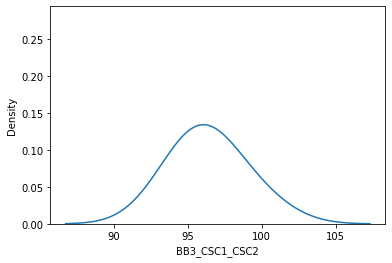

In [197]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC2_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_CSC1_CSC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC2_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_CSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  95.98686013129516
parameter K is:  3.0788998560508745


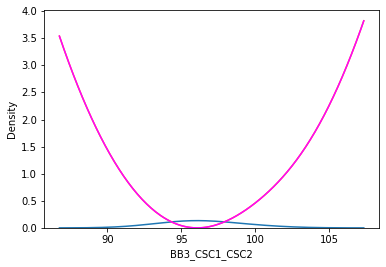

In [198]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[96, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_CSC1_CSC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 149.66327272727275
Mode: Raw data 149.19583496364544
Mode: Gauss-fitted 149.19583496364544


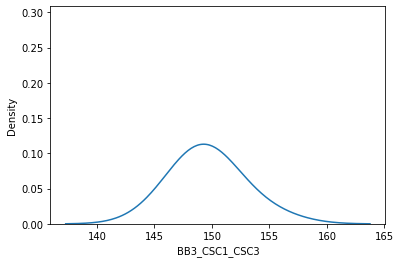

In [199]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_CSC1_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  149.1228519860357
parameter K is:  3.531287851278977


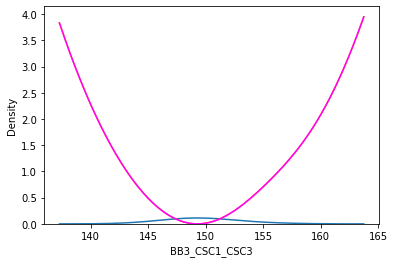

In [200]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[149, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_CSC1_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_CSC2_CSC3_Hmapped_angle_all
Mean: Raw data 62.005909090909086
Mode: Raw data 62.02212417242305
Mode: Gauss-fitted 62.02212417242305


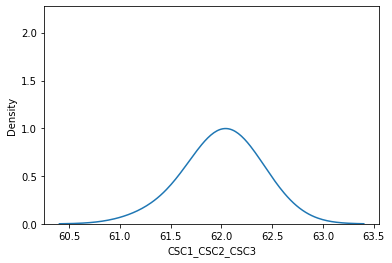

In [201]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC1_CSC2_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(CSC1_CSC2_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_CSC2_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  61.60846183835457
parameter K is:  7.044248771716872


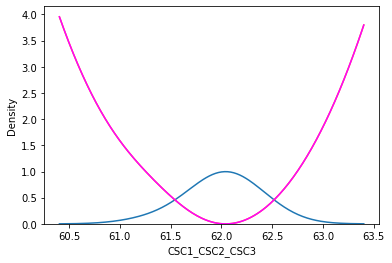

In [202]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[62, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC1_CSC2_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 70.34018181818182
Mode: Raw data 70.42306585630567
Mode: Gauss-fitted 70.42306585630567


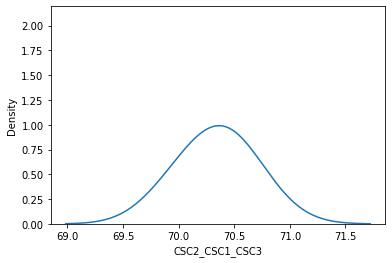

In [203]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC1_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC1_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  70.48872220783468
parameter K is:  6.434604602028751


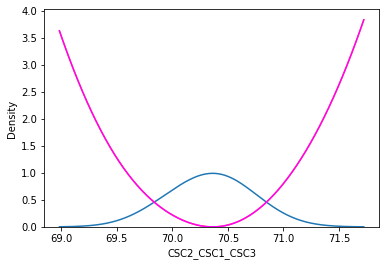

In [204]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70.4, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC2_CSC1_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_CSC1_Hmapped_angle_all
Mean: Raw data 47.65381818181818
Mode: Raw data 47.62726291339746
Mode: Gauss-fitted 47.62726291339746


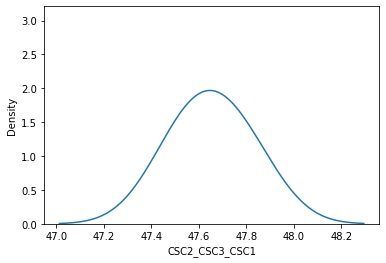

In [205]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_CSC1_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC3_CSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_CSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  47.822567294306836
parameter K is:  56.94024275990203


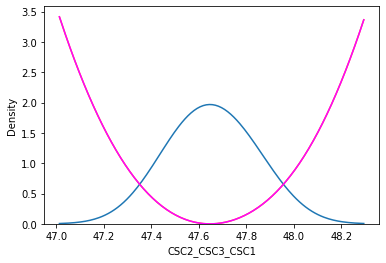

In [206]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[47.7, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC2_CSC3_CSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [207]:
angle_parameters['Parameter'] = angle_parameters_dict['Parameter']
angle_parameters['raw data mean value'] = angle_parameters_dict['raw data mean value']
angle_parameters['raw data mode value gaussian-fitted mode value'] = angle_parameters_dict['raw data mode value gaussian-fitted mode value']
angle_parameters['Seed value obtained using BOltzmann inversion'] = angle_parameters_dict['Seed value obtained using BOltzmann inversion']
angle_parameters['K from boltzmann inversion'] = angle_parameters_dict['K from boltzmann inversion']
angle_parameters.head()
angle_parameters.to_csv("sirna_parameters_Angle.csv")